In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
sns.set(style = "whitegrid") #font_scale = 1.3)

from IPython.display import set_matplotlib_formats

import warnings
warnings.filterwarnings("ignore")


# Mac OS를 이용하고 있기 떄문에 AppleGothic을 설정했습니다.
# 윈도우의 경우 다른 폰트를 사용해주셔야 합니다. 나눔폰트가 있는 경우 'NanumGothic' 없는 경우에는 'Malgun Gothic'을 사용해주세요.
# matplotlib.rc('font', family='AppleGothic')
matplotlib.rc('font', family='Malgun Gothic')

# 폰트를 바꿀 경우 마이너스가 표시되지 않는 경우도 있는데 이를 막아주는 코드입니다.
matplotlib.rc('axes', unicode_minus=False)
matplotlib.rcParams['axes.unicode_minus'] = False

# retina 옵션을 통해 해상도를 올립니다.
set_matplotlib_formats('retina')

# 화면에 출력하는 데이터 프레임의 최대 row 수를 500으로 설정합니다.
pd.set_option('display.max_rows', 500)

# 화면에 출력하는 데이터 프레임의 최대 column 수를 500으로 설정합니다.
pd.set_option('display.max_columns', 500)

In [3]:
train = pd.read_csv('data/real_real_train.csv', index_col = [0], encoding = 'euc-kr')
del train['Unnamed: 0.1']
train.head()


,gu,dong,apartment_id,apt,exclusive_use_area,year_of_completion,floor,transaction_real_price,hanriver,transaction_year,hakgun,exclusive_use_area_group,hakgun_rank,year_of_completion_group,pop,gu_area,diff_year,rebuilding,river_re,gu_mean,apt_age_group,dep_shop,강남과의 거리,kangnam,subway_distance,hospital_distance,park_distance,sub_dis_group,hos_dis_group,park_gu_count
0,송파구,가락동,11072,풍림1,80.52,1995,5,1500,0,2011,6,2,3,1990,690466,33.88,16,0,1,69447,10,1,4.354,2,0.208855,0.328274,0.240551,1,1.0,25
1,송파구,가락동,7155,시영1,40.09,1980,5,5000,0,2008,6,1,3,1980,676580,33.88,28,0,1,69447,20,1,4.354,2,0.517188,1.832828,0.325262,2,4.0,25
2,송파구,가락동,7155,시영1,40.09,1980,2,5000,0,2010,6,1,3,1980,693144,33.88,30,1,2,69447,30,1,4.354,2,0.517188,1.832828,0.325262,2,4.0,25
3,송파구,가락동,7155,시영1,45.12,1980,1,5000,0,2011,6,1,3,1980,690466,33.88,31,1,2,69447,30,1,4.354,2,0.517188,1.832828,0.325262,2,4.0,25
4,송파구,가락동,7155,시영1,40.09,1980,2,6000,0,2010,6,1,3,1980,693144,33.88,30,1,2,69447,30,1,4.354,2,0.517188,1.832828,0.325262,2,4.0,25


In [42]:
abs(train.corr()['transaction_real_price']).sort_values(ascending = False)

transaction_real_price      1.000000
exclusive_use_area          0.668717
exclusive_use_area_group    0.603305
gu_mean                     0.595677
hakgun_rank                 0.518919
강남과의 거리                     0.485249
kangnam                     0.456580
park_gu_count               0.384385
dep_shop                    0.325747
river_re                    0.321551
hanriver                    0.286348
gu_area                     0.267520
rebuilding                  0.239557
hakgun                      0.220111
floor                       0.142295
subway_distance             0.134936
sub_dis_group               0.119735
transaction_year            0.115091
hospital_distance           0.081973
pop                         0.076535
hos_dis_group               0.068899
park_distance               0.063640
diff_year                   0.041220
apt_age_group               0.040671
apartment_id                0.016458
year_of_completion_group    0.006486
year_of_completion          0.005060
N

In [36]:
df = abs(train[['transaction_real_price', 'exclusive_use_area', 'hakgun_rank', '강남과의 거리', 'park_gu_count', 'dep_shop', 'river_re', 'hanriver' ,'gu_area', 'rebuilding']])
df

,transaction_real_price,exclusive_use_area,hakgun_rank,강남과의 거리,park_gu_count,dep_shop,river_re,hanriver,gu_area,rebuilding
0,1500.0,80.5200,3.0,4.354,25.0,1.0,1.0,0.0,33.88,0.0
1,5000.0,40.0900,3.0,4.354,25.0,1.0,1.0,0.0,33.88,0.0
2,5000.0,40.0900,3.0,4.354,25.0,1.0,2.0,0.0,33.88,1.0
3,5000.0,45.1200,3.0,4.354,25.0,1.0,2.0,0.0,33.88,1.0
4,6000.0,40.0900,3.0,4.354,25.0,1.0,2.0,0.0,33.88,1.0
...,...,...,...,...,...,...,...,...,...,...
742280,180208.0,207.5717,2.0,9.382,3.0,3.0,1.0,0.0,9.96,0.0
742281,186091.0,240.5395,2.0,9.382,3.0,3.0,1.0,0.0,9.96,0.0
742282,209128.0,252.0567,2.0,9.382,3.0,3.0,1.0,0.0,9.96,0.0
742283,209854.0,260.0287,2.0,9.382,3.0,3.0,1.0,0.0,9.96,0.0


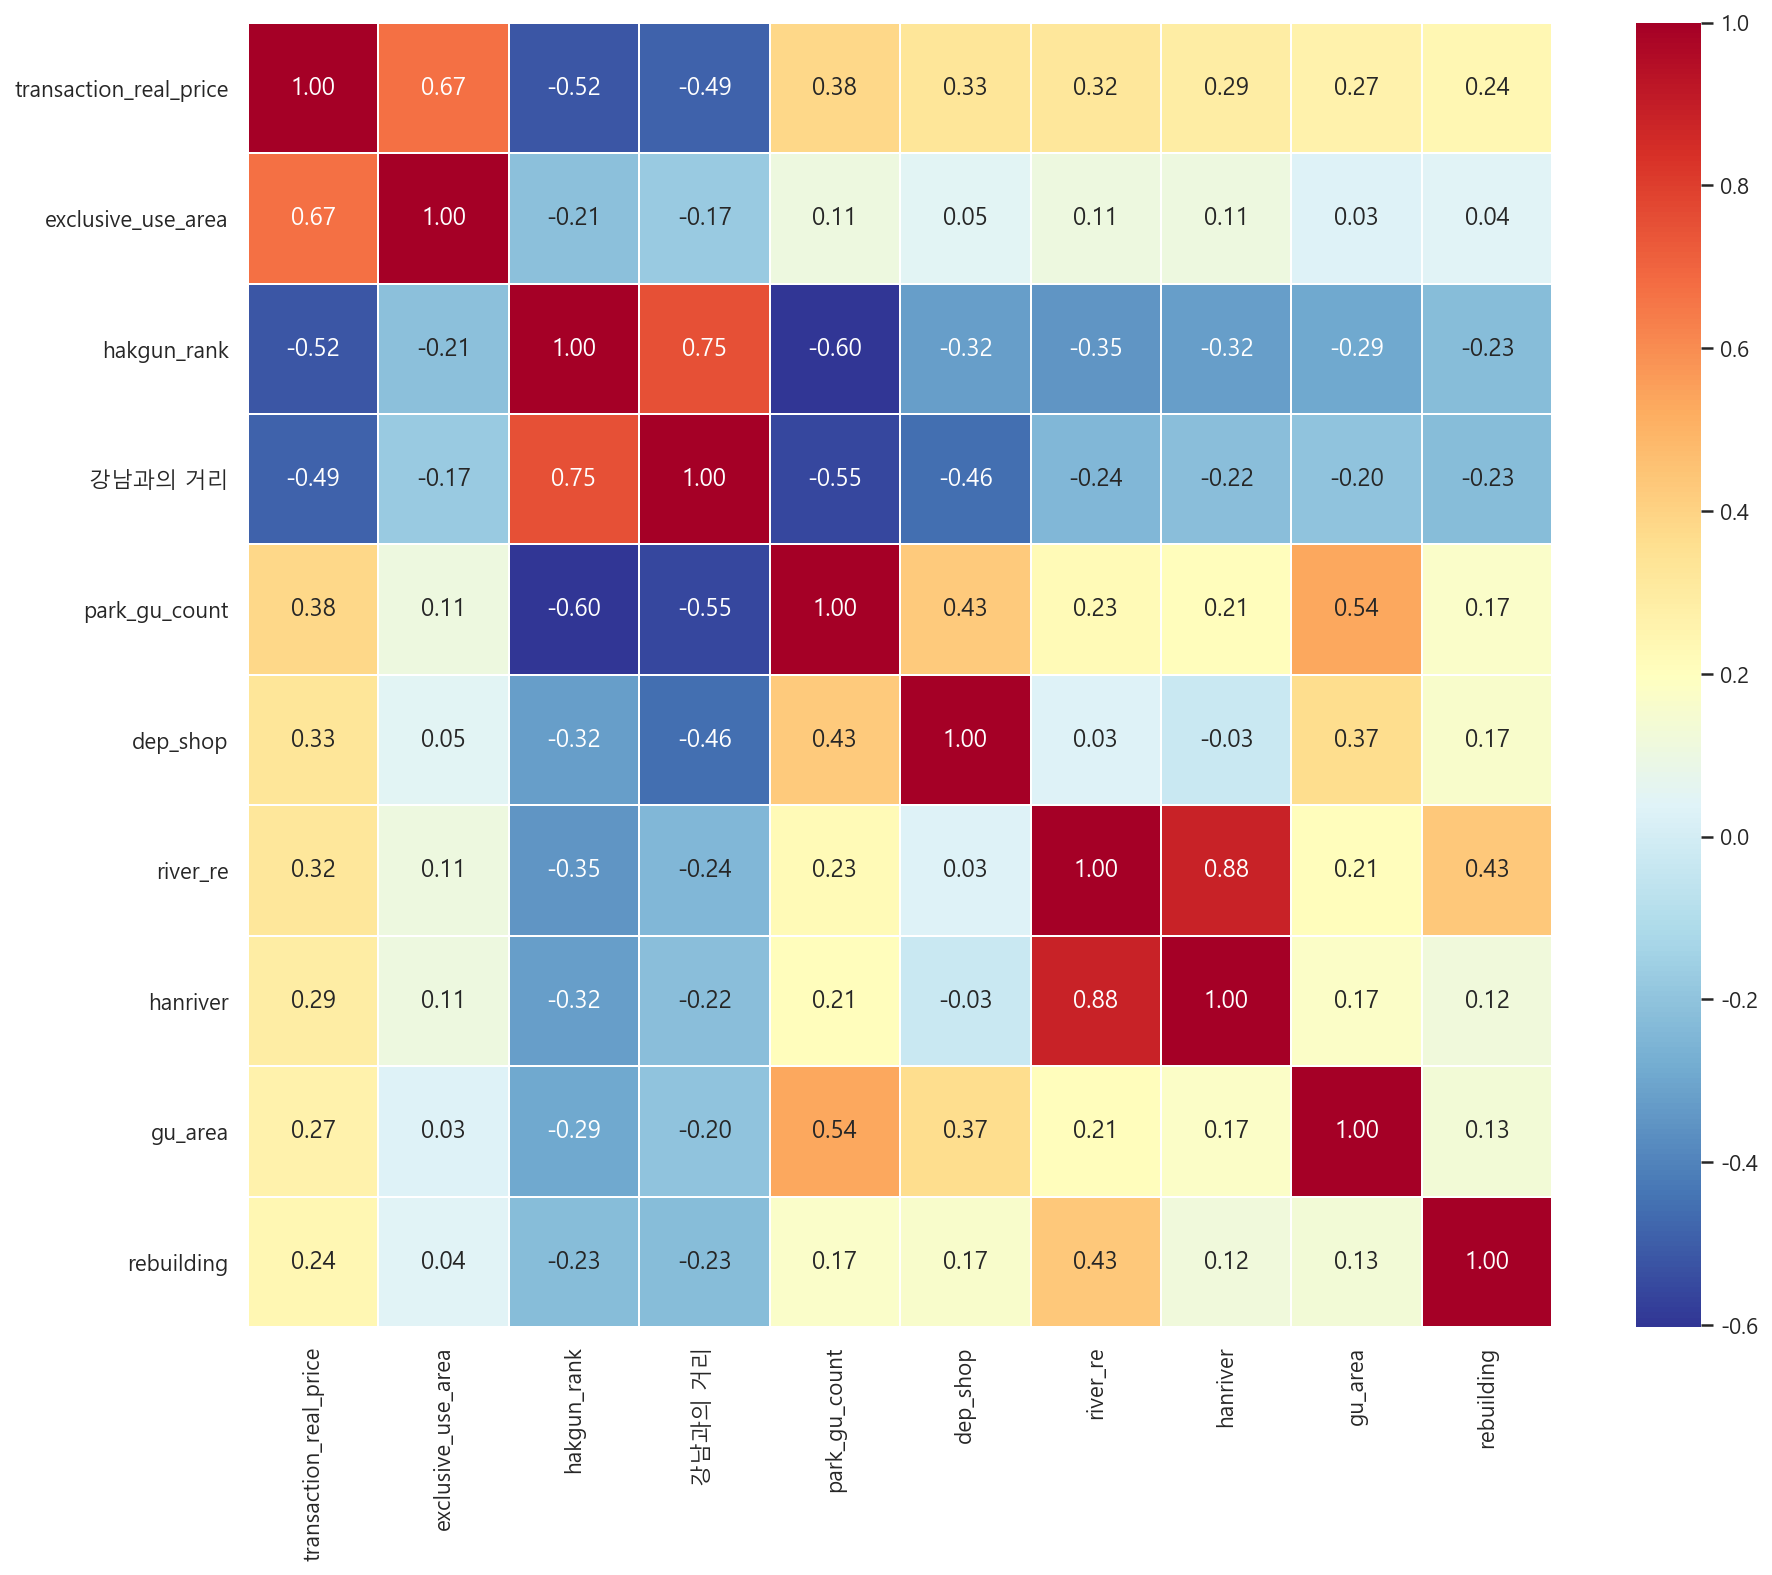

In [41]:

#상관관계 확인
k=df.shape[1] #히트맵 변수 갯수
corrmat = abs(df.corr()) #변수간의 상관관계
cols = corrmat.nlargest(k, 'transaction_real_price')['transaction_real_price'].index #price기준으로 제일 큰순서대로 20개를 뽑아냄
cm = np.corrcoef(df[cols].values.T)
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(data = cm, annot=True, square=True, fmt = '.2f', linewidths=.5, cmap='RdYlBu_r', 
            yticklabels = cols.values, xticklabels = cols.values)